In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.metrics import make_scorer

# 시계열

from datetime import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import statsmodels.api as sm


from sklearn.metrics import mean_absolute_error, mean_squared_error

data_dir='C:/Download/2020bigcontest-master/2020bigcontest-master/data/total'
data_list = os.listdir(data_dir)


#항목별 저장
data_list_single_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인타자')]
data_single_hitter = [pd.read_csv(os.path.join(data_dir, data_list_single_hitter[x]), encoding='cp949') for x in range(len(data_list_single_hitter))]
data_list_single_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('개인투수')]
data_single_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_single_pitcher[x]), encoding='cp949') for x in range(len(data_list_single_pitcher))]
data_list_games = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('경기')]
data_games = [pd.read_csv(os.path.join(data_dir, data_list_games[x]), encoding='cp949') for x in range(len(data_list_games))]
data_list_player_enroll = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('등록선수')]
data_player_enroll = [pd.read_csv(os.path.join(data_dir, data_list_player_enroll[x]), encoding='cp949') for x in range(len(data_list_player_enroll))]
data_list_players = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('선수')]
data_players = [pd.read_csv(os.path.join(data_dir, data_list_players[x]), encoding='cp949') for x in range(len(data_list_players))]
data_list_teams = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀')]
data_teams = [pd.read_csv(os.path.join(data_dir, data_list_teams[x]), encoding='cp949') for x in range(len(data_list_teams))]
data_list_team_hitter = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀타자')]
data_team_hitter = [pd.read_csv(os.path.join(data_dir, data_list_team_hitter[x]), encoding='cp949') for x in range(len(data_list_team_hitter))]
data_list_team_pitcher = [data_list[x] for x in range(len(data_list)) if data_list[x].split('_')[-2].startswith('팀투수')]
data_team_pitcher = [pd.read_csv(os.path.join(data_dir, data_list_team_pitcher[x]), encoding='cp949') for x in range(len(data_list_team_pitcher))]


team_hitter=pd.concat(data_team_hitter,axis=0)
team_pitcher=pd.concat(data_team_pitcher,axis=0)
for i in range(0,5):
     data_team_hitter[i]['AVG']=data_team_hitter[i]['HIT']/data_team_hitter[i]['AB']


from datetime import datetime as dt
from dateutil.parser import parse
team_2016=data_team_hitter[0]
team_2017=data_team_hitter[1]
team_2018=data_team_hitter[2]
team_2019=data_team_hitter[3]
team_2020=data_team_hitter[4]
df_list=[team_2016,team_2017,team_2018,team_2019,team_2020]
for i in df_list:
    i['y']=i['HIT']/i['AB']
    
    i['ds']=pd.to_datetime(i['G_ID'].apply(lambda x: parse(str(x[:8])+str(x[12:])+'00000',yearfirst=True)),errors='raise')
    i['H1']=i['HIT']-i['H2']-i['H3']-i['HR']

In [8]:
team=pd.concat(df_list,axis=0)

In [10]:
from statsmodels.tsa.stattools import adfuller

def print_adfuller(inputSeries):
    result = adfuller(inputSeries)
    print('p-value: %f' % result[1])
    return result[1]

In [11]:
t=list(team_hitter['T_ID'].unique())
hit_team_list=[0]*10
for i in range(len(hit_team_list)):
    hit_team_list[i]=team_hitter[team_hitter['T_ID']==t[i]]

In [12]:

t=list(team_pitcher['T_ID'].unique())
pit_team_list=[0]*10
for i in range(len(pit_team_list)):
    pit_team_list[i]=team_pitcher[team_pitcher['T_ID']==t[i]]

In [13]:
#타자 데이터의 모든 팀별 데이터의 모든 컬럼에 대해 정상성 검정 시행
hit_con_cols=team_hitter.columns[6:]



results=[]
for t in hit_team_list:

    for i in hit_con_cols:
        
        
        pvalue=print_adfuller(t[i])
        if pvalue>0.05:
            print(i)
        results.append(pvalue)

p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.001153
p-value: 0.000009
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0.000000
p-value: 0

In [20]:

df=pd.DataFrame()

In [21]:
df['p-value']=results

In [43]:
df['significance']=df['p-value']<0.05

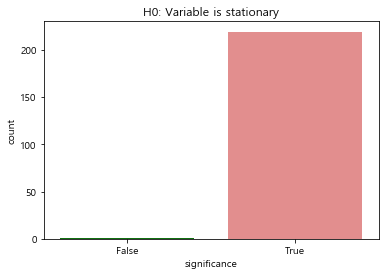

In [44]:
plt.title('H0: Variable is stationary')
ax=sns.countplot(df['significance'],palette=['green','lightcoral'])


In [45]:
df[df['significance']==False]['p-value']

147    0.05187
Name: p-value, dtype: float64

In [46]:
def lgbm_hitter_eda(year, team_name):
    year_index = year - 2016 
    
    # team_hitter data에 해당 경기의 해당 팀의 홈 어웨이 여부 column 추가
    data_games_year = data_games[year_index]
    data_games_year = data_games_year[['G_ID', 'VISIT_KEY', 'HOME_KEY']]
    data_games_year = data_games_year.set_index('G_ID')
    
    data_team_hitter_year = data_team_hitter[year_index]
    data_team_hitter_year = pd.merge(data_team_hitter_year, data_games_year, how='left', on=['G_ID'])

    data_team_hitter_year_team = data_team_hitter_year[data_team_hitter_year.T_ID == team_name]
    df = data_team_hitter_year_team
    df['HOME_KEY'] = df['HOME_KEY'].map(lambda x: 1 if x == team_name else 0 )
    df = df.drop(columns = ['VISIT_KEY', 'G_ID'])
    
    df.reset_index(inplace=True, drop=True) #index 재정렬
    
    # LabelEncoding
    encoder = LabelEncoder()

    df['VS_T_ID'] = encoder.fit_transform(df['VS_T_ID']) #상대편
    df['TB_SC'] = encoder.fit_transform(df['TB_SC']) #이닝 초/말
    
    
    ### 이부분은 모든 EDA에서 동일하게 작성
    
    # GDAY_DS => Datetime type
    df['GDAY_DS'] = df['GDAY_DS'].astype(str) + (df['HEADER_NO']+1).astype(str)
    df['year']=df['GDAY_DS'].str.slice(0,4).astype(int)
    df['month']=df['GDAY_DS'].str.slice(4,6).astype(int)
    df['H1']=df['HIT']-df['H2']-df['H3']-df['HR']
    dt = []
    for i in df['GDAY_DS']:
        dt_ = datetime.strptime(i, '%Y%m%d%H')
        dt.append(dt_)
    df['GDAY_DS'] = pd.Series(dt)
    df['month']=df['GDAY_DS'].apply(lambda x: x.month)
    
    #장타율
    df['SLG']=(df['HIT']+df['HP']+df['BB'])/(df['AB']+df['BB']+df['HP']+df['SF'])
    #출루율
    df['OBA']=(df['H1']+2*df['H2']+3*df['H3']+4*df['HR'])/df['AB']
    df['W_OPS']=0.57* df['SLG']+0.43*df['OBA']
    
    
    
    df = df.drop(columns=['T_ID'])
    #lags
    #lags=[1,4,6,12,30,60]
    #for lag in lags:
    #    df['AVG_lag_'+str(lag)]=df['AVG'].shift(lag).astype(np.float16)
    #SK Expanding window 추가
    #df['expanding_AVG_mean']=df['AVG'].transform(lambda x: x.expanding(2).mean().astype(np.float16))
    #rolling window
    #df['rolling_AVG_mean']=df['AVG'].transform(lambda x: x.rolling(window=7).mean().astype(np.float16))
    #trend
    
    # 경기당 타율 column 생성
    df['AVG'] = df['HIT'] / df['AB']
    
    df['avg_AVG'] = df['AVG'].mean()
    df['AVG_trend'] = (df['AVG'] - df['avg_AVG']).astype(np.float16)
    df.drop(['avg_AVG'],axis=1,inplace=True)
    
    # Drop Categorical feature for 시계열 => coint 과정에서 singular matrix 발생
    df = df.drop(columns=[ 'HOME_KEY'])
    
    

#     df = df.drop(columns=['T_ID', 'HEADER_NO', 'CG_CK', 'BK'])
#     df = df.drop(columns=['TB_SC', 'HR', 'SB', 'VS_T_ID', 'HOME_KEY', 'HOLD', 'INN2', 'BF', 'CS', 'SH', 'HP', 'GD', 'ERR' ,'ER'])
    df_year_team_name = df
    
    return df_year_team_name

In [55]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
def make_y_next(df, rm_range, target):
    df['y_next'] = 0
    
    t_dict = {}
    t_list = []
    count = 0
    f_count = 0
    for i, v in enumerate(df[target]):

        if df[target].index[i] == df[target].index[-1]:
            t_dict[str(f_count)] = round(np.mean(np.array(t_list)),5)

        t_list.append(v)
        count += 1

        if count == rm_range:
            t_dict[str(f_count)] = round(np.mean(np.array(t_list)),5)
            count = 0
            t_list = []
            f_count += 1

    rm_dict = {}
    rm_list = []
    rm_count = 0
    rm_fcount = 0

    for i, v in enumerate(df['y_next']):
        if df['y_next'].index[i] == df['y_next'].index[-1]:
            rm_dict[str(rm_fcount)] = rm_list

        rm_list.append(i)
        rm_count += 1

        if rm_count == rm_range:
            rm_dict[str(rm_fcount)] = rm_list
            rm_count = 0
            rm_list = []
            rm_fcount +=1

    for k, v in rm_dict.items():
        try:
            df['y_next'].iloc[v] = t_dict[str(int(k)+1)]
        except: 
            df['y_next'].iloc[v] = np.nan
            
    return df

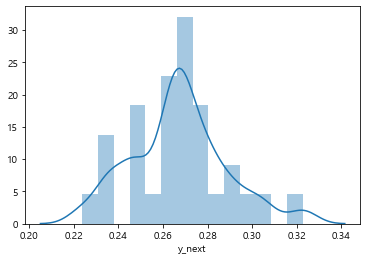

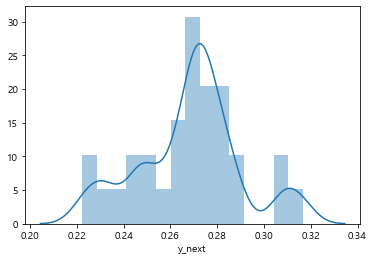

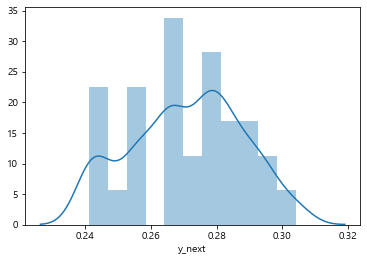

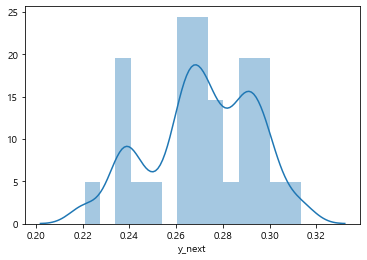

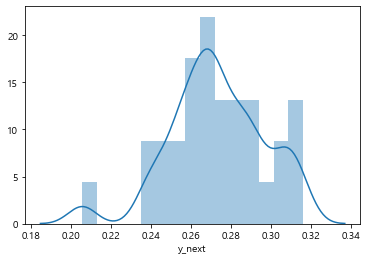

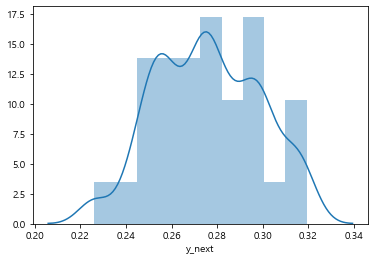

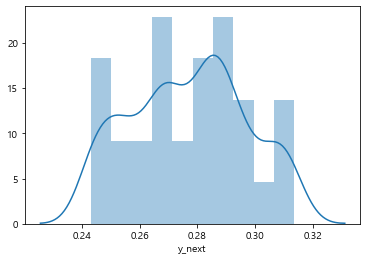

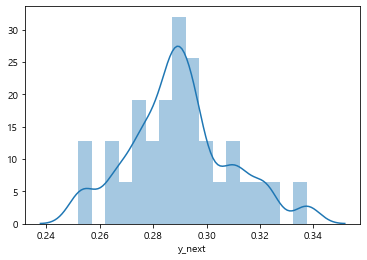

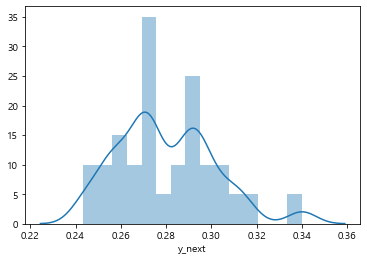

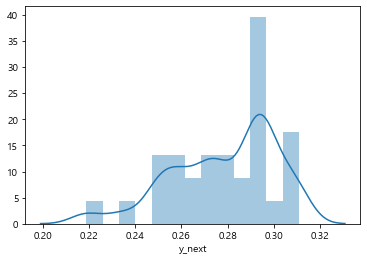

In [70]:

team_name=team_2020['T_ID'].unique()
for t in team_name:
    df_SS_2016 = lgbm_hitter_eda(2016, t)
    df_SS_2017 = lgbm_hitter_eda(2017, t)
    df_SS_2018 = lgbm_hitter_eda(2018,t)
    df_SS_2019 = lgbm_hitter_eda(2019, t)
    df_SS_2020 = lgbm_hitter_eda(2020, t)
    df_SS=pd.concat([df_SS_2016,df_SS_2017,df_SS_2018,df_SS_2019,df_SS_2020],axis=0)
    df_SS

    make_y_next(df_SS,20,'AVG')
    
    sns.distplot(df_SS['y_next'])
    plt.show()
